<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-16 12:32:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  40.8MB/s    in 0.9s    

2024-01-16 12:32:50 (40.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


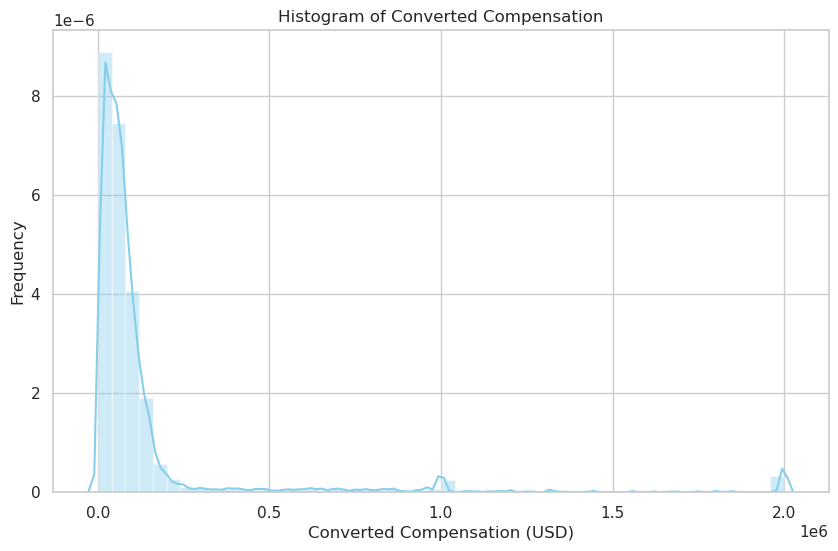

In [6]:
import pandas as pd

# Assuming your dataset is in CSV format
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(dataset_url)

# Now you can proceed with the histogram code
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], kde=True, bins=50, color='skyblue')

# Set labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()

### Box Plots


Plot a box plot of `Age.`


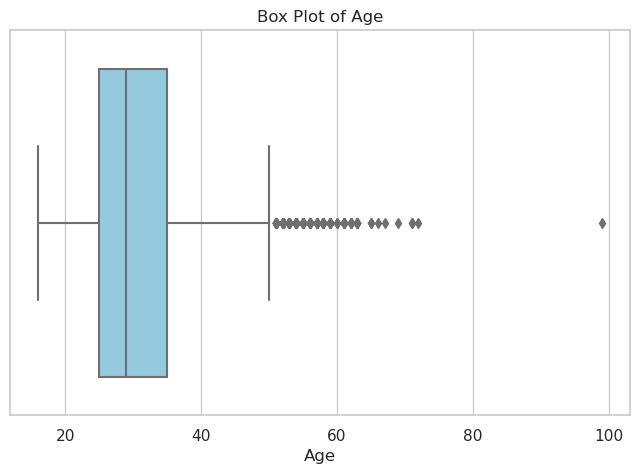

In [7]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for 'Age'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


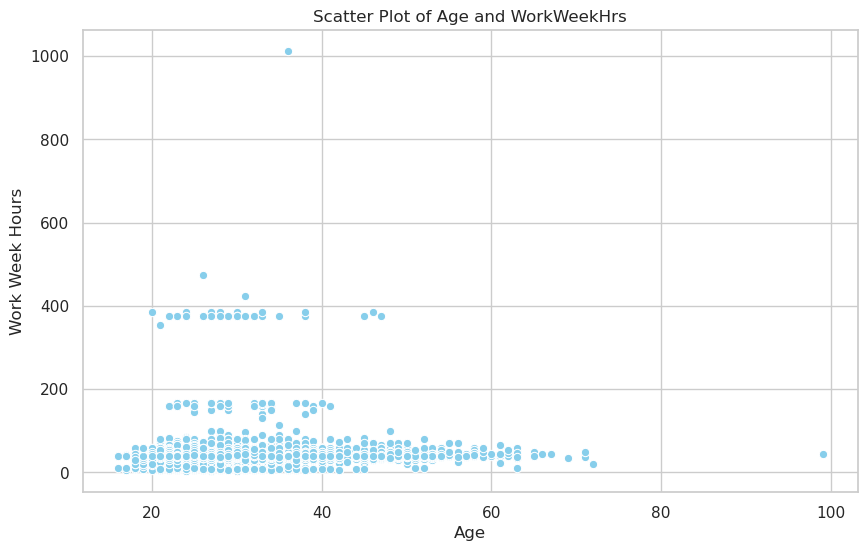

In [8]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for 'Age' and 'WorkWeekHrs'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Scatter Plot of Age and WorkWeekHrs')

# Show the plot
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


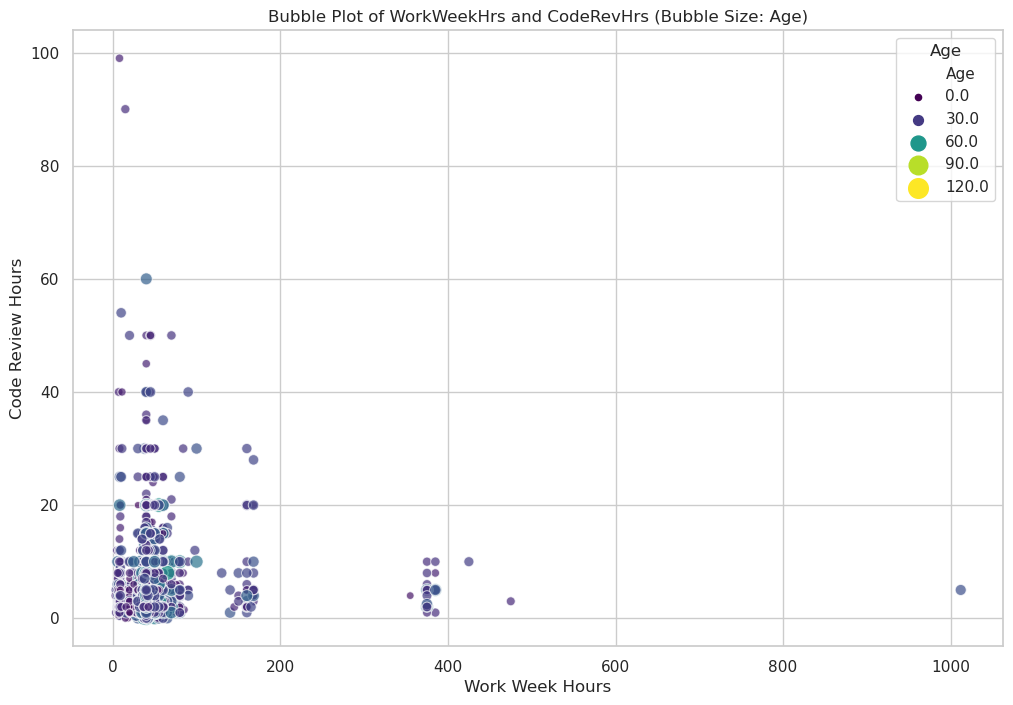

In [9]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bubble plot for 'WorkWeekHrs' and 'CodeRevHrs' with 'Age' as bubble size
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['WorkWeekHrs'], y=df['CodeRevHrs'], size=df['Age'], sizes=(20, 200), hue=df['Age'], palette='viridis', alpha=0.7)

# Set labels and title
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Bubble Size: Age)')

# Show the legend
plt.legend(title='Age')

# Show the plot
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


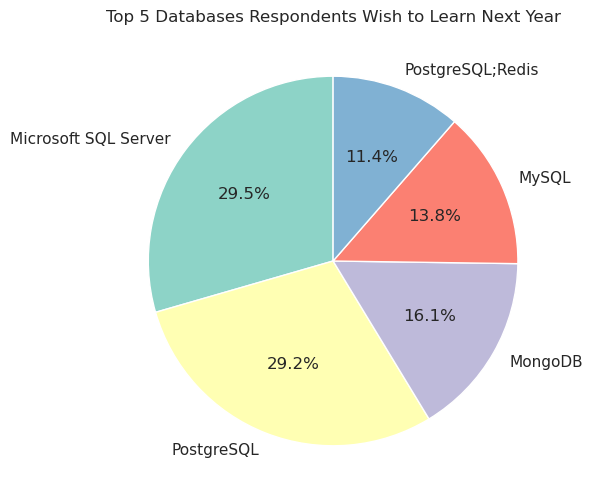

In [10]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming 'DatabaseDesireNextYear' is the column containing the database preferences
top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Set title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Show the plot
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1200x800 with 0 Axes>

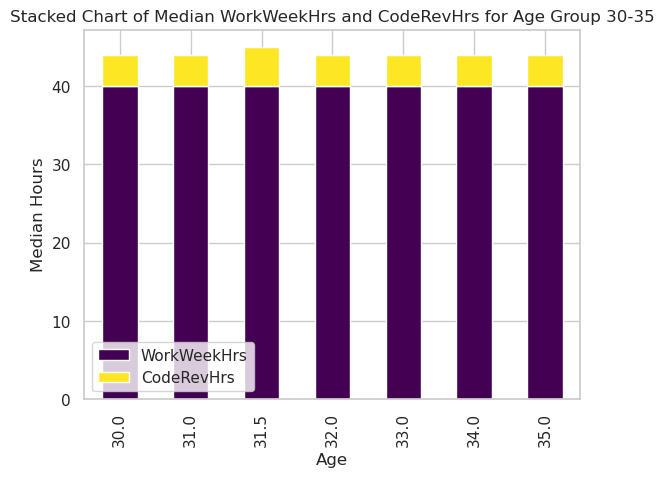

In [11]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the age group 30 to 35
age_group_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate median WorkWeekHrs and CodeRevHrs for the age group
median_hours = age_group_df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Create a stacked chart
plt.figure(figsize=(12, 8))
median_hours.plot(kind='bar', stacked=True, colormap='viridis')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

# Show the plot
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


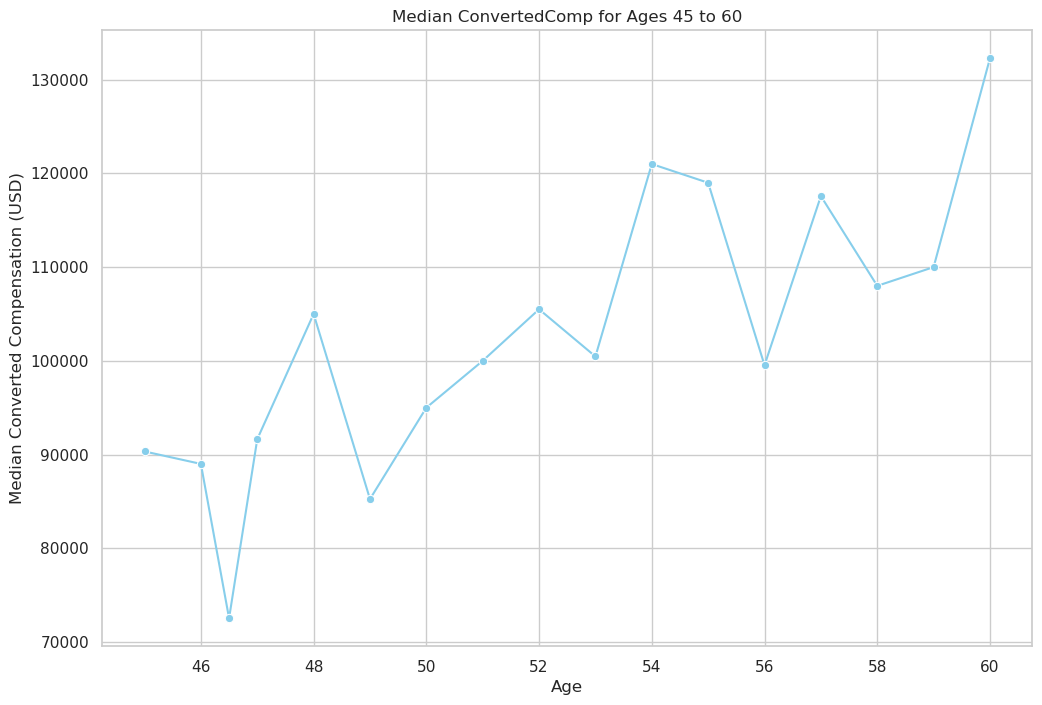

In [12]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the age range 45 to 60
age_range_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate median ConvertedComp for each age
median_comp_by_age = age_range_df.groupby('Age')['ConvertedComp'].median()

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values, marker='o', color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation (USD)')
plt.title('Median ConvertedComp for Ages 45 to 60')

# Show the plot
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


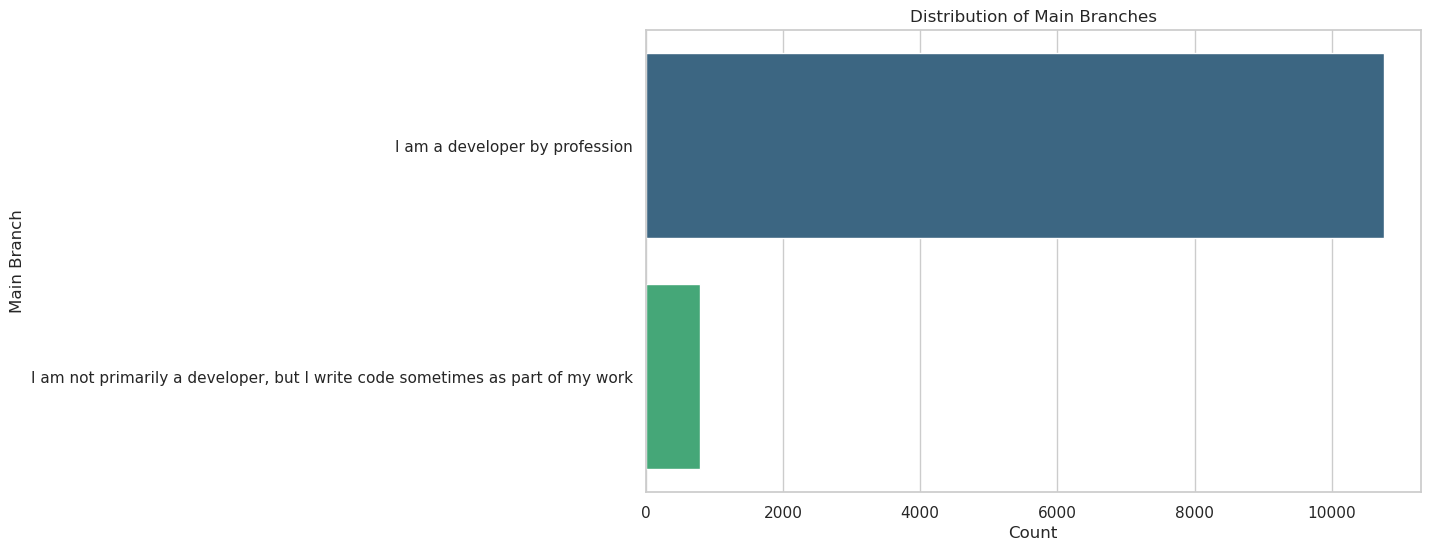

In [13]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each value in the 'MainBranch' column
main_branch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=main_branch_counts, y=main_branch_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branches')

# Show the plot
plt.show()

Close the database connection.


In [14]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
